<a href="https://colab.research.google.com/github/HenriqueCrj/AulasPython/blob/master/Henrique_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1)  Escreva uma função em Python chamada def gamma (beta):que tenha como argumento β e retorna γ. Teste-o para um valor de β, como por exemplo, 0,6.

(2)  Certifique-se de que sua função gama (beta) pode aceitar um vetor de β e retornar um vetor compatível de γ.

(3)  A partir de um vetor de valores β variando de 0 a 0,995, faça um gráfico gamma versus β.

(4)  Faça um gráfico γβ versus β. O que você observa?

(5)  Trace o argumento do log natural na equação de Bethe-Block em uma função  de γβ. Faça o argumento ser uma nova função ln_argument().  Para você:  essa função deve aceitar β ou γ como um argumento, ou ambos, ou seu produto?  Observe que pode ser muito difícil obter β com uma boa precisão a partir γ em baixas velocidades; o oposto é difícil em velocidades muito altas.  Faça o gráfico para um intervalo de 0,1 a 100.

(6)  Esse gráfico não mostra a região de interessante para valores baixos de β.  Faça o plot com uma escala logarítmica no eixo vertical?  Dica:  Procure na ajuda do matplotlib a função semilogy().  Ficou melhor?  Talvez ambos os eixos?

(7)  Provável que agora, seus valores γβ não estão uniformemente espaçados no gráfico.  Faça um vetor de valores γβ que tenham um logaritmo uniformemente espaçado de 0,1 a 100. Repita o gráfico mais uma vez usando os novos argumentos.  Uma identidade útil aqui é γ² = (γβ)² + 1

(8)  Plote o conteúdo dos colchetes versus γβ usando o mesmo espaçaamento do vetor de log para o argumento x.  Para termos números reais de I, escolha múons que penetram em um absorvedor de cobre.  Esse é um número adimensional que pode variar de 3,55 a mais de 16.

(9)  Finalmente, plote toda a equação −(dE/dx), a energia perdida por unidade de distância,para múons que passam pelo cobre.  Os dados de que você precisa sobre o cobre estão todos no PDG. Além disso, pode encontrar mais sobre o múon aqui.  Convertendo para nossas unidades, a perda de energia deve ter uma largura mínima de 13 MeV / cm para o momento do múon ou energia em torno de 300 MeV.

http://physics.princeton.edu/~phy209/week2/index.html

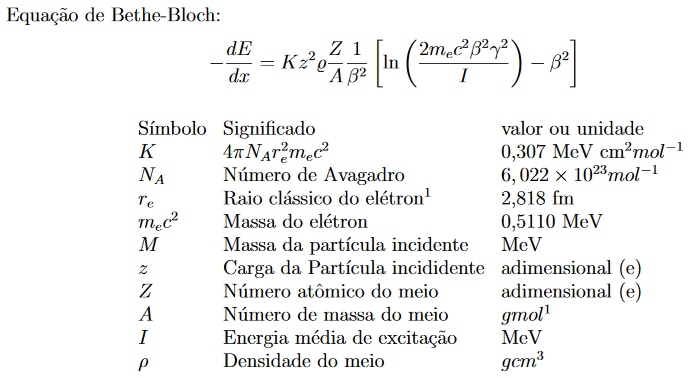

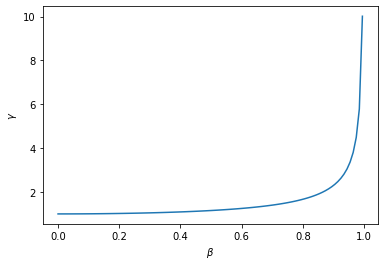

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

K = 0.307
e_mass = 0.5110
z = 1.
Z = 29.
A = 63.546
I = 322.0e-6
rho = 8.960

def gamma(beta): #Parte 1 e 2
    """Calcula o fator de Lorentz para um beta
    Args:
        beta: razão v/c

    Returns:
        fator de Lorentz
    """
    return 1/np.sqrt(1 - beta*beta)

betas = np.linspace(0,0.995,100)
gammas = gamma(betas)

plt.ylabel(r"$\gamma$")
plt.xlabel(r"$\beta$")
plt.plot(betas,gammas) #Parte 3

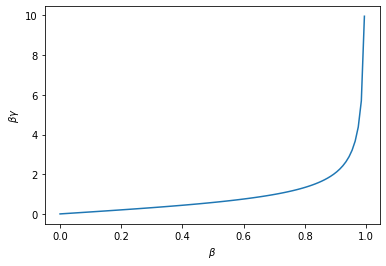

In [ ]:
gammabetas = betas*gammas

plt.ylabel(r"$\beta\gamma$")
plt.xlabel(r"$\beta$")
plt.plot(betas,gammabetas) #Parte 4

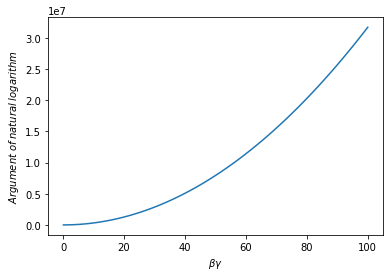

In [ ]:
def ln_argument(gammabeta):
    """Calcula o argumento do logaritmo natural da equação de Bethe-Bloch
    Args:
        gammabeta: produto beta*gamma

    Returns:
         argumento do logaritmo natural
    """
    return (2*e_mass*(gammabeta)*(gammabeta))/I

gammabetas2 = np.linspace(0.1,100,100)

plt.ylabel(r"$Argument\; of\; natural\; logarithm$")
plt.xlabel(r"$\beta\gamma$")
plt.plot(gammabetas2,ln_argument(gammabetas2)) #Parte 5

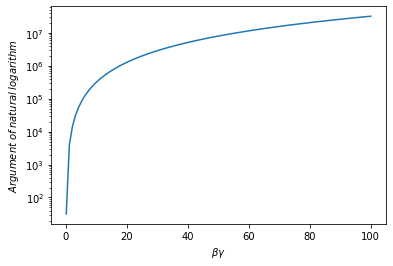

In [ ]:
plt.ylabel(r"$Argument\; of\; natural\; logarithm$")
plt.xlabel(r"$\beta\gamma$")
plt.semilogy(gammabetas2,ln_argument(gammabetas2)) #Parte 6

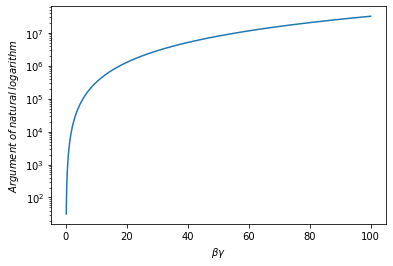

In [ ]:
gammabetas_log = np.logspace(np.log(0.1),np.log(100),100,base=np.e) #vetor de logaritmos igualmente espaçados

plt.ylabel(r"$Argument\; of\; natural\; logarithm$")
plt.xlabel(r"$\beta\gamma$")
plt.semilogy(gammabetas_log,ln_argument(gammabetas_log)) #Parte 7????

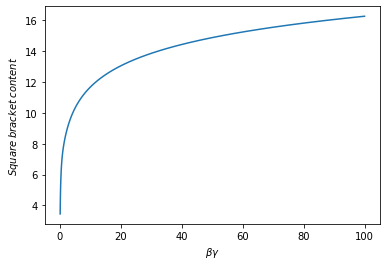

In [ ]:
def brackets(gammabeta):
    """Calcula o argumento dentro dos colchetes da equação de Bethe-Bloch
    Args:
        gammabeta: produto beta*gamma

    Returns:
         argumento entre colchetes
    """
    return np.log(ln_argument(gammabeta)) - (1 - 1/((gammabeta)*(gammabeta)+1)) #Foi usada a relação gamma^2 = (gama*beta)^2 + 1

plt.ylabel(r"$Square\; bracket\; content$")
plt.xlabel(r"$\beta\gamma$")
plt.plot(gammabetas_log,brackets(gammabetas_log)) #Parte 8????

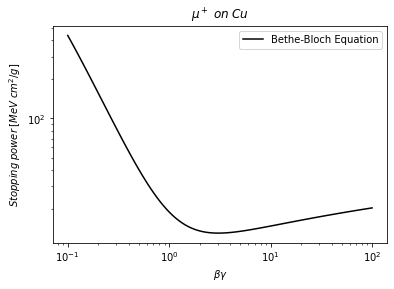

In [ ]:
def energy_loss(gammabeta):
    """Calcula a perda de energia pela distância da equação de Bethe-Bloch
    Args:
        gammabeta: produto beta*gamma

    Returns:
         poder de parada do material
    """
    beta_squared = (1 - 1/((gammabeta)*(gammabeta) + 1))
    return (K*z*z*rho*(Z/A)*(1/beta_squared)*brackets(gammabeta))#/10 #Dividindo por 10 dá certo, talvez o problema seja uma das constantes multiplicativas?

plt.title(r"$\mu^+ \;on \;Cu$")
plt.ylabel(r"$Stopping\; power \; [MeV\;cm^2/g]$")
plt.xlabel(r"$\beta\gamma$")
plt.loglog(gammabetas_log,energy_loss(gammabetas_log),color="black",label="Bethe-Bloch Equation") #Parte 9???
plt.legend()

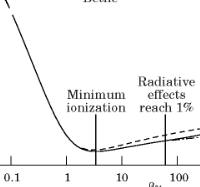

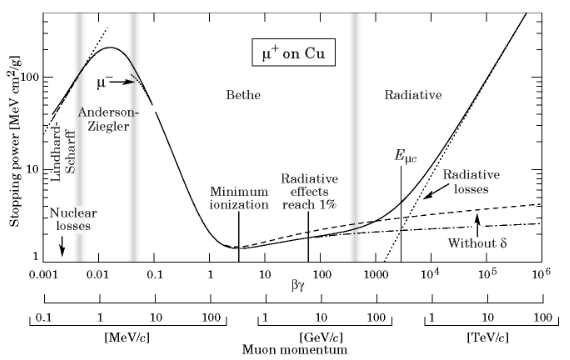